<div>
<img src="https://cdn-images-1.medium.com/max/1024/1*-QTg-_71YF0SVshMEaKZ_g.png" 
   width="400" style="margin: 50px auto; display: block; position: relative; left: -30px;" />
</div>

<!--NAVIGATION-->
<!--NAVIGATION-->
# [PyTorch Primer](1-pytorch.ipynb) | TensorFlow Primer | [PyT vs TF](3-pytorch_vs_tf.ipynb) | [JAX](4-jax.ipynb)

## Submodule -1.4 : A Primer on PyTorch and Tensorflow

## Table of Contents

#### 1. [Installation](#Building-TensorFlow)
#### 3. [Basics of TensorFlow](##Basics-of-TensorFlow)
#### 4. [Automatic Differentiation](#Automatic-Differentiation)



# Building TensorFlow

### Install TensorFlow2

In [ ]:
!pip3 install tensorflow

# Basics of TensorFlow

#### Tensors and Properties

#### Methods on Tensors

###### Sum

In [ ]:
import tensorflow as tf
print(f"Version of TF version: {tf.__version__}")

# Set seed for reproducibility
tf.random.set_seed(0)
# Random Matrix of shape=(3,3)
x = tf.random.normal((3,3), mean=0.0, stddev=1.0, dtype=tf.dtypes.float32,\
                     seed=None,name=None)
print(f"x: {x}")


###### Reshape : `view` and  `reshape`  methods

In [ ]:
#### Inplace Reshaping
# A vector of length N=10
x = tf.convert_to_tensor([1,2,3,4,5,6,7,8,9,10, 11, 12])

# Reshape in amatrix of shape= (2,5)
print(tf.shape(x).numpy())

x = tf.reshape(x, [4, 3])

print(tf.shape(x).numpy())
print(x)

###### Computing Norm of a vector using `norm` method

$$
L_p~\text{norm}:
||{\mathbf{x}}||_p = \left(\sum_i |x_i|^p\right)^{\frac{1}{p}}
$$


$$
L^1~\text{norm}:
|| {\mathbf{x}} ||_1 = |x_1| + |x_2| + \ldots + |x_n|
$$

$$
L^2~\text{norm}:
|| {\mathbf{x}} ||_2 = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}
$$



In [ ]:
tf.random.set_seed(0)
x = tf.random.normal((10,1))
l1 = tf.norm(x, ord=1)
l2 = tf.norm(x, ord=2)

print(f"L1 Norm of x is:{l1}")
print(f"L2 Norm of x is:{l2}")


###### Computing Norm of a vector without using the method

In [ ]:
n1 = tf.reduce_sum(tf.abs(x))
print(f"L1 norm: is: {n1}")
n2 = tf.sqrt(tf.reduce_sum(x**2))
print(f"L2 norm: is: {n2}")


### Tensors on GPU

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices())
tf.debugging.set_log_device_placement(True)

a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)




### Mapping tensors to GPU

In [ ]:
with tf.device('/CPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)

print(c)


### NumPy ----> TensorFlow ----> NumPy

In [ ]:
import numpy as np
x = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], dtype=float)
x_tf = tf.convert_to_tensor(x, dtype=tf.float32)
print("*******NumPy To Tensor*******)")
print("Numpy array is:", x)
print("TF Tensor is:", x_tf)
print("*******Tensor To NumPy*******")
print("TF Tensor is:", x_tf.numpy())


### Eager mode and Graph mode


In [ ]:
import tensorflow as tf
import timeit

In [ ]:
#tf.config.run_functions_eagerly(False)

x = tf.constant([1., 4., 9., 16., 25.])

## Eager Function
def f_e(x):
    y=x ** 2
    print("Evaluted in Eager Mode y:", y)
    return y 


@tf.function(jit_compile=True)
def f_g(x):
    y=x ** 2
    print("Evaluted in Graph Mode y:", y)
    return y 

print("Graph time:", timeit.timeit(lambda: f_g(x), number=1000))
print("Eager time:", timeit.timeit(lambda: f_e(x), number=1000))


### Function Approximation

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib.pyplot as plt


batch_size = 50
x = np.linspace(-1, 1, num=batch_size)
x_eval = np.linspace(-0.8, 0.8, num=batch_size).reshape(-1,1)


y = x**2
# Add Random Noise
y = y + 0.05*np.random.normal(np.shape(y))
#y = 2*((y - np.min(y))/(np.max(y) - np.min(y))) - 1
x = x.reshape((-1, 1))
y = y.reshape((-1, 1)) 

y_eval = x_eval**2
#y_eval = 2*((y_eval - np.min(y_eval))/(np.max(y_eval) - np.min(y_eval))) - 1


### Sequential model
model = keras.Sequential()
model.add(keras.layers.Dense(32, input_dim=x.shape[1],\
                             kernel_initializer='he_normal', \
                             activation="tanh"))


model.add(keras.layers.Dense(32, kernel_initializer='he_normal', \
                             activation="tanh"))
print(model.predict(x).shape)
model.add(keras.layers.Dense(1, kernel_initializer='he_normal', activation='linear'))

model.compile(optimizer='adam', 
                  loss='mse',
                  metrics=['mse'])

model.fit(x, y, epochs=5000, batch_size=np.size(x), verbose=1)

y_pred = model.predict(x, batch_size=np.size(x))





(50, 32)
Epoch 1/5000
1/1 [==============================] - 0s 165ms/step - loss: 9.2834 - mse: 9.2834
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.0598 - mse: 9.0598
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.8503 - mse: 8.8503
Epoch 4/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.6551 - mse: 8.6551
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.4743 - mse: 8.4743
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.3079 - mse: 8.3079
Epoch 7/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.1555 - mse: 8.1555
Epoch 8/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.0170 - mse: 8.0170
Epoch 9/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.8916 - mse: 7.8916
Epoch 10/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.7787 - mse: 7.7787
Epoch 11/5000
1/1 [==============================] - 0s 1m

1/1 [==============================] - 0s 2ms/step - loss: 0.5370 - mse: 0.5370
Epoch 89/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5048 - mse: 0.5048
Epoch 90/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4759 - mse: 0.4759
Epoch 91/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4502 - mse: 0.4502
Epoch 92/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4275 - mse: 0.4275
Epoch 93/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4076 - mse: 0.4076
Epoch 94/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3903 - mse: 0.3903
Epoch 95/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3754 - mse: 0.3754
Epoch 96/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3626 - mse: 0.3626
Epoch 97/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3517 - mse: 0.3517
Epoch 98/5000
1/1 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 2ms/step - loss: 0.2113 - mse: 0.2113
Epoch 175/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2105 - mse: 0.2105
Epoch 176/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2097 - mse: 0.2097
Epoch 177/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2089 - mse: 0.2089
Epoch 178/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2081 - mse: 0.2081
Epoch 179/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2073 - mse: 0.2073
Epoch 180/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2065 - mse: 0.2065
Epoch 181/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2057 - mse: 0.2057
Epoch 182/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2050 - mse: 0.2050
Epoch 183/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2042 - mse: 0.2042
Epoch 184/5000
1/1 [==============================] - 0s 2ms/step

Epoch 260/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1537 - mse: 0.1537
Epoch 261/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1531 - mse: 0.1531
Epoch 262/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1525 - mse: 0.1525
Epoch 263/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1519 - mse: 0.1519
Epoch 264/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1513 - mse: 0.1513
Epoch 265/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1507 - mse: 0.1507
Epoch 266/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1502 - mse: 0.1502
Epoch 267/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1496 - mse: 0.1496
Epoch 268/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1490 - mse: 0.1490
Epoch 269/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1484 - mse: 0.1484
Epoch 270/5000
1/1 [==============================

1/1 [==============================] - 0s 1ms/step - loss: 0.1035 - mse: 0.1035
Epoch 347/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1029 - mse: 0.1029
Epoch 348/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1023 - mse: 0.1023
Epoch 349/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1017 - mse: 0.1017
Epoch 350/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1012 - mse: 0.1012
Epoch 351/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1006 - mse: 0.1006
Epoch 352/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1000 - mse: 0.1000
Epoch 353/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0994 - mse: 0.0994
Epoch 354/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0988 - mse: 0.0988
Epoch 355/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0982 - mse: 0.0982
Epoch 356/5000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0545 - mse: 0.0545
Epoch 433/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0540 - mse: 0.0540
Epoch 434/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0535 - mse: 0.0535
Epoch 435/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0530 - mse: 0.0530
Epoch 436/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0525 - mse: 0.0525
Epoch 437/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0520 - mse: 0.0520
Epoch 438/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0515 - mse: 0.0515
Epoch 439/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0511 - mse: 0.0511
Epoch 440/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0506 - mse: 0.0506
Epoch 441/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0501 - mse: 0.0501
Epoch 442/5000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 4ms/step - loss: 0.0241 - mse: 0.0241
Epoch 519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0239 - mse: 0.0239
Epoch 520/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0237 - mse: 0.0237
Epoch 521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0235 - mse: 0.0235
Epoch 522/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0233 - mse: 0.0233
Epoch 523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0231 - mse: 0.0231
Epoch 524/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0229 - mse: 0.0229
Epoch 525/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0227 - mse: 0.0227
Epoch 526/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0226 - mse: 0.0226
Epoch 527/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0224 - mse: 0.0224
Epoch 528/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0147 - mse: 0.0147
Epoch 605/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0147 - mse: 0.0147
Epoch 606/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0146 - mse: 0.0146
Epoch 607/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0146 - mse: 0.0146
Epoch 608/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0145 - mse: 0.0145
Epoch 609/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0145 - mse: 0.0145
Epoch 610/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0144 - mse: 0.0144
Epoch 611/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0144 - mse: 0.0144
Epoch 612/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 614/5000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0112 - mse: 0.0112
Epoch 691/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0111 - mse: 0.0111
Epoch 692/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0111 - mse: 0.0111
Epoch 693/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0111 - mse: 0.0111
Epoch 694/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0110 - mse: 0.0110
Epoch 695/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110 - mse: 0.0110
Epoch 696/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0110 - mse: 0.0110
Epoch 697/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109 - mse: 0.0109
Epoch 698/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109 - mse: 0.0109
Epoch 699/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109 - mse: 0.0109
Epoch 700/5000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 1ms/step - loss: 0.0087 - mse: 0.0087
Epoch 777/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0087 - mse: 0.0087
Epoch 778/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0087 - mse: 0.0087
Epoch 779/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0086 - mse: 0.0086
Epoch 780/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0086 - mse: 0.0086
Epoch 781/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0086 - mse: 0.0086
Epoch 782/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0086 - mse: 0.0086
Epoch 783/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0086 - mse: 0.0086
Epoch 784/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0085 - mse: 0.0085
Epoch 785/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0085 - mse: 0.0085
Epoch 786/5000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0069 - mse: 0.0069
Epoch 863/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0069 - mse: 0.0069
Epoch 864/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 865/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 866/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 867/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 868/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 869/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 870/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0067 - mse: 0.0067
Epoch 871/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0067 - mse: 0.0067
Epoch 872/5000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0054 - mse: 0.0054
Epoch 949/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0054 - mse: 0.0054
Epoch 950/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0054 - mse: 0.0054
Epoch 951/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0054 - mse: 0.0054
Epoch 952/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0054 - mse: 0.0054
Epoch 953/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0054 - mse: 0.0054
Epoch 954/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0054 - mse: 0.0054
Epoch 955/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0053 - mse: 0.0053
Epoch 956/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0053 - mse: 0.0053
Epoch 957/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0053 - mse: 0.0053
Epoch 958/5000
1/1 [==============================] - 0s 2ms/step

Epoch 1034/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043
Epoch 1035/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.0043
Epoch 1036/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043
Epoch 1037/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043
Epoch 1038/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043
Epoch 1039/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043
Epoch 1040/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0043 - mse: 0.0043
Epoch 1041/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042
Epoch 1042/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042 - mse: 0.0042
Epoch 1043/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042 - mse: 0.0042
Epoch 1044/5000
1/1 [===================

1/1 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1120/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1121/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1122/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1123/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1124/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1125/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1126/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1127/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1128/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - mse: 0.0034
Epoch 1129/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028
Epoch 1205/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028
Epoch 1206/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028
Epoch 1207/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1208/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1209/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1210/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1211/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1212/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027
Epoch 1214/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023
Epoch 1290/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023
Epoch 1291/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - mse: 0.0022
Epoch 1292/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - mse: 0.0022
Epoch 1293/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - mse: 0.0022
Epoch 1294/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022
Epoch 1295/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022
Epoch 1296/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - mse: 0.0022
Epoch 1297/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - mse: 0.0022
Epoch 1298/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - mse: 0.0022
Epoch 1299/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019
Epoch 1375/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019
Epoch 1376/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019
Epoch 1377/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019
Epoch 1378/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019
Epoch 1379/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019
Epoch 1380/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019
Epoch 1381/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018
Epoch 1382/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018
Epoch 1383/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018
Epoch 1384/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1460/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1461/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1462/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1463/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1464/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1465/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1466/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1467/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1468/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1469/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1545/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1546/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1547/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1548/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1549/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1550/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1551/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1552/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1553/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1554/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1630/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1631/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1632/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1633/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1634/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1635/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1636/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1637/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1638/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1639/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1715/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1716/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1717/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1722/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1724/5000
1/1 [==============================] - 0

Epoch 1799/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1800/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1801/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1802/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1803/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1804/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1805/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1806/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1807/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1808/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1809/5000
1/1 [===================

1/1 [==============================] - 0s 2ms/step - loss: 9.8195e-04 - mse: 9.8195e-04
Epoch 1883/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.8118e-04 - mse: 9.8118e-04
Epoch 1884/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.8041e-04 - mse: 9.8041e-04
Epoch 1885/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.7965e-04 - mse: 9.7965e-04
Epoch 1886/5000
1/1 [==============================] - 0s 4ms/step - loss: 9.7889e-04 - mse: 9.7889e-04
Epoch 1887/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.7813e-04 - mse: 9.7813e-04
Epoch 1888/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.7738e-04 - mse: 9.7738e-04
Epoch 1889/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.7662e-04 - mse: 9.7662e-04
Epoch 1890/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.7586e-04 - mse: 9.7586e-04
Epoch 1891/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.751

1/1 [==============================] - 0s 2ms/step - loss: 9.2603e-04 - mse: 9.2603e-04
Epoch 1961/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.2536e-04 - mse: 9.2536e-04
Epoch 1962/5000
1/1 [==============================] - 0s 4ms/step - loss: 9.2469e-04 - mse: 9.2469e-04
Epoch 1963/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.2401e-04 - mse: 9.2401e-04
Epoch 1964/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.2334e-04 - mse: 9.2334e-04
Epoch 1965/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.2267e-04 - mse: 9.2267e-04
Epoch 1966/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.2200e-04 - mse: 9.2200e-04
Epoch 1967/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.2133e-04 - mse: 9.2133e-04
Epoch 1968/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.2067e-04 - mse: 9.2067e-04
Epoch 1969/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.200

1/1 [==============================] - 0s 2ms/step - loss: 8.7596e-04 - mse: 8.7596e-04
Epoch 2039/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.7535e-04 - mse: 8.7535e-04
Epoch 2040/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.7474e-04 - mse: 8.7474e-04
Epoch 2041/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.7413e-04 - mse: 8.7413e-04
Epoch 2042/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.7352e-04 - mse: 8.7352e-04
Epoch 2043/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.7291e-04 - mse: 8.7291e-04
Epoch 2044/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.7230e-04 - mse: 8.7230e-04
Epoch 2045/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.7169e-04 - mse: 8.7169e-04
Epoch 2046/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.7108e-04 - mse: 8.7108e-04
Epoch 2047/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.704

1/1 [==============================] - 0s 2ms/step - loss: 8.2995e-04 - mse: 8.2995e-04
Epoch 2117/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.2939e-04 - mse: 8.2939e-04
Epoch 2118/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.2882e-04 - mse: 8.2882e-04
Epoch 2119/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.2825e-04 - mse: 8.2825e-04
Epoch 2120/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.2767e-04 - mse: 8.2767e-04
Epoch 2121/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.2711e-04 - mse: 8.2711e-04
Epoch 2122/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.2655e-04 - mse: 8.2655e-04
Epoch 2123/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.2598e-04 - mse: 8.2598e-04
Epoch 2124/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.2541e-04 - mse: 8.2541e-04
Epoch 2125/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.248

1/1 [==============================] - 0s 2ms/step - loss: 7.8690e-04 - mse: 7.8690e-04
Epoch 2195/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8636e-04 - mse: 7.8636e-04
Epoch 2196/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8582e-04 - mse: 7.8582e-04
Epoch 2197/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8529e-04 - mse: 7.8529e-04
Epoch 2198/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.8475e-04 - mse: 7.8475e-04
Epoch 2199/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8422e-04 - mse: 7.8422e-04
Epoch 2200/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8369e-04 - mse: 7.8369e-04
Epoch 2201/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.8315e-04 - mse: 7.8315e-04
Epoch 2202/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8262e-04 - mse: 7.8262e-04
Epoch 2203/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.820

1/1 [==============================] - 0s 1ms/step - loss: 7.4612e-04 - mse: 7.4612e-04
Epoch 2273/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.4561e-04 - mse: 7.4561e-04
Epoch 2274/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.4510e-04 - mse: 7.4510e-04
Epoch 2275/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.4459e-04 - mse: 7.4459e-04
Epoch 2276/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.4408e-04 - mse: 7.4408e-04
Epoch 2277/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.4357e-04 - mse: 7.4357e-04
Epoch 2278/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.4306e-04 - mse: 7.4306e-04
Epoch 2279/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.4256e-04 - mse: 7.4256e-04
Epoch 2280/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.4204e-04 - mse: 7.4204e-04
Epoch 2281/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.415

1/1 [==============================] - 0s 3ms/step - loss: 7.0719e-04 - mse: 7.0719e-04
Epoch 2351/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.0671e-04 - mse: 7.0671e-04
Epoch 2352/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.0622e-04 - mse: 7.0622e-04
Epoch 2353/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.0573e-04 - mse: 7.0573e-04
Epoch 2354/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.0524e-04 - mse: 7.0524e-04
Epoch 2355/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.0475e-04 - mse: 7.0475e-04
Epoch 2356/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.0427e-04 - mse: 7.0427e-04
Epoch 2357/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.0378e-04 - mse: 7.0378e-04
Epoch 2358/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.0329e-04 - mse: 7.0329e-04
Epoch 2359/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.028

1/1 [==============================] - 0s 2ms/step - loss: 6.6983e-04 - mse: 6.6983e-04
Epoch 2429/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.6936e-04 - mse: 6.6936e-04
Epoch 2430/5000
1/1 [==============================] - 0s 1ms/step - loss: 6.6889e-04 - mse: 6.6889e-04
Epoch 2431/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.6842e-04 - mse: 6.6842e-04
Epoch 2432/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.6795e-04 - mse: 6.6795e-04
Epoch 2433/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.6749e-04 - mse: 6.6749e-04
Epoch 2434/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.6702e-04 - mse: 6.6702e-04
Epoch 2435/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.6655e-04 - mse: 6.6655e-04
Epoch 2436/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.6608e-04 - mse: 6.6608e-04
Epoch 2437/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.656

1/1 [==============================] - 0s 2ms/step - loss: 6.3385e-04 - mse: 6.3385e-04
Epoch 2507/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3339e-04 - mse: 6.3339e-04
Epoch 2508/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3294e-04 - mse: 6.3294e-04
Epoch 2509/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3249e-04 - mse: 6.3249e-04
Epoch 2510/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3204e-04 - mse: 6.3204e-04
Epoch 2511/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3159e-04 - mse: 6.3159e-04
Epoch 2512/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3113e-04 - mse: 6.3113e-04
Epoch 2513/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.3068e-04 - mse: 6.3068e-04
Epoch 2514/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.3023e-04 - mse: 6.3023e-04
Epoch 2515/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.297

1/1 [==============================] - 0s 1ms/step - loss: 5.9911e-04 - mse: 5.9911e-04
Epoch 2585/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.9867e-04 - mse: 5.9867e-04
Epoch 2586/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.9823e-04 - mse: 5.9823e-04
Epoch 2587/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.9780e-04 - mse: 5.9780e-04
Epoch 2588/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.9736e-04 - mse: 5.9736e-04
Epoch 2589/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.9692e-04 - mse: 5.9692e-04
Epoch 2590/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.9649e-04 - mse: 5.9649e-04
Epoch 2591/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.9605e-04 - mse: 5.9605e-04
Epoch 2592/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.9561e-04 - mse: 5.9561e-04
Epoch 2593/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.951

1/1 [==============================] - 0s 1ms/step - loss: 5.6552e-04 - mse: 5.6552e-04
Epoch 2663/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.6510e-04 - mse: 5.6510e-04
Epoch 2664/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.6467e-04 - mse: 5.6467e-04
Epoch 2665/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.6425e-04 - mse: 5.6425e-04
Epoch 2666/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.6383e-04 - mse: 5.6383e-04
Epoch 2667/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.6341e-04 - mse: 5.6341e-04
Epoch 2668/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.6298e-04 - mse: 5.6298e-04
Epoch 2669/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.6256e-04 - mse: 5.6256e-04
Epoch 2670/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.6214e-04 - mse: 5.6214e-04
Epoch 2671/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.617

1/1 [==============================] - 0s 2ms/step - loss: 5.3302e-04 - mse: 5.3302e-04
Epoch 2741/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.3261e-04 - mse: 5.3261e-04
Epoch 2742/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.3220e-04 - mse: 5.3220e-04
Epoch 2743/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.3179e-04 - mse: 5.3179e-04
Epoch 2744/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.3138e-04 - mse: 5.3138e-04
Epoch 2745/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.3098e-04 - mse: 5.3098e-04
Epoch 2746/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.3057e-04 - mse: 5.3057e-04
Epoch 2747/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.3016e-04 - mse: 5.3016e-04
Epoch 2748/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.2975e-04 - mse: 5.2975e-04
Epoch 2749/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.293

1/1 [==============================] - 0s 3ms/step - loss: 5.0157e-04 - mse: 5.0157e-04
Epoch 2819/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.0117e-04 - mse: 5.0117e-04
Epoch 2820/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.0077e-04 - mse: 5.0077e-04
Epoch 2821/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.0038e-04 - mse: 5.0038e-04
Epoch 2822/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.9998e-04 - mse: 4.9998e-04
Epoch 2823/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.9959e-04 - mse: 4.9959e-04
Epoch 2824/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.9919e-04 - mse: 4.9919e-04
Epoch 2825/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.9879e-04 - mse: 4.9879e-04
Epoch 2826/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.9840e-04 - mse: 4.9840e-04
Epoch 2827/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.980

1/1 [==============================] - 0s 4ms/step - loss: 4.7113e-04 - mse: 4.7113e-04
Epoch 2897/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.7074e-04 - mse: 4.7074e-04
Epoch 2898/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.7036e-04 - mse: 4.7036e-04
Epoch 2899/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.6998e-04 - mse: 4.6998e-04
Epoch 2900/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.6959e-04 - mse: 4.6959e-04
Epoch 2901/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.6921e-04 - mse: 4.6921e-04
Epoch 2902/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.6883e-04 - mse: 4.6883e-04
Epoch 2903/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.6845e-04 - mse: 4.6845e-04
Epoch 2904/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.6806e-04 - mse: 4.6806e-04
Epoch 2905/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.676

1/1 [==============================] - 0s 2ms/step - loss: 4.4170e-04 - mse: 4.4170e-04
Epoch 2975/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.4132e-04 - mse: 4.4132e-04
Epoch 2976/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.4095e-04 - mse: 4.4095e-04
Epoch 2977/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.4058e-04 - mse: 4.4058e-04
Epoch 2978/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.4021e-04 - mse: 4.4021e-04
Epoch 2979/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.3984e-04 - mse: 4.3984e-04
Epoch 2980/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.3947e-04 - mse: 4.3947e-04
Epoch 2981/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.3910e-04 - mse: 4.3910e-04
Epoch 2982/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.3873e-04 - mse: 4.3873e-04
Epoch 2983/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.383

1/1 [==============================] - 0s 1ms/step - loss: 4.1326e-04 - mse: 4.1326e-04
Epoch 3053/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.1290e-04 - mse: 4.1290e-04
Epoch 3054/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.1254e-04 - mse: 4.1254e-04
Epoch 3055/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.1219e-04 - mse: 4.1219e-04
Epoch 3056/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.1183e-04 - mse: 4.1183e-04
Epoch 3057/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.1147e-04 - mse: 4.1147e-04
Epoch 3058/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.1111e-04 - mse: 4.1111e-04
Epoch 3059/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.1075e-04 - mse: 4.1075e-04
Epoch 3060/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.1040e-04 - mse: 4.1040e-04
Epoch 3061/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.100

1/1 [==============================] - 0s 3ms/step - loss: 3.8583e-04 - mse: 3.8583e-04
Epoch 3131/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.8548e-04 - mse: 3.8548e-04
Epoch 3132/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.8514e-04 - mse: 3.8514e-04
Epoch 3133/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.8479e-04 - mse: 3.8479e-04
Epoch 3134/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.8445e-04 - mse: 3.8445e-04
Epoch 3135/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.8410e-04 - mse: 3.8410e-04
Epoch 3136/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.8376e-04 - mse: 3.8376e-04
Epoch 3137/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.8341e-04 - mse: 3.8341e-04
Epoch 3138/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.8307e-04 - mse: 3.8307e-04
Epoch 3139/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.827

1/1 [==============================] - 0s 1ms/step - loss: 3.5941e-04 - mse: 3.5941e-04
Epoch 3209/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.5908e-04 - mse: 3.5908e-04
Epoch 3210/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5875e-04 - mse: 3.5875e-04
Epoch 3211/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.5842e-04 - mse: 3.5842e-04
Epoch 3212/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5808e-04 - mse: 3.5808e-04
Epoch 3213/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5775e-04 - mse: 3.5775e-04
Epoch 3214/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.5742e-04 - mse: 3.5742e-04
Epoch 3215/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.5709e-04 - mse: 3.5709e-04
Epoch 3216/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.5676e-04 - mse: 3.5676e-04
Epoch 3217/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.564

1/1 [==============================] - 0s 3ms/step - loss: 3.3403e-04 - mse: 3.3403e-04
Epoch 3287/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.3371e-04 - mse: 3.3371e-04
Epoch 3288/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.3339e-04 - mse: 3.3339e-04
Epoch 3289/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.3307e-04 - mse: 3.3307e-04
Epoch 3290/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.3275e-04 - mse: 3.3275e-04
Epoch 3291/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.3244e-04 - mse: 3.3244e-04
Epoch 3292/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.3212e-04 - mse: 3.3212e-04
Epoch 3293/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.3180e-04 - mse: 3.3180e-04
Epoch 3294/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.3148e-04 - mse: 3.3148e-04
Epoch 3295/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.311

1/1 [==============================] - 0s 4ms/step - loss: 3.0970e-04 - mse: 3.0970e-04
Epoch 3365/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.0939e-04 - mse: 3.0939e-04
Epoch 3366/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.0909e-04 - mse: 3.0909e-04
Epoch 3367/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.0878e-04 - mse: 3.0878e-04
Epoch 3368/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.0847e-04 - mse: 3.0847e-04
Epoch 3369/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.0817e-04 - mse: 3.0817e-04
Epoch 3370/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.0787e-04 - mse: 3.0787e-04
Epoch 3371/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.0756e-04 - mse: 3.0756e-04
Epoch 3372/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.0726e-04 - mse: 3.0726e-04
Epoch 3373/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.069

1/1 [==============================] - 0s 2ms/step - loss: 2.8643e-04 - mse: 2.8643e-04
Epoch 3443/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8614e-04 - mse: 2.8614e-04
Epoch 3444/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8585e-04 - mse: 2.8585e-04
Epoch 3445/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.8556e-04 - mse: 2.8556e-04
Epoch 3446/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8527e-04 - mse: 2.8527e-04
Epoch 3447/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8498e-04 - mse: 2.8498e-04
Epoch 3448/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8469e-04 - mse: 2.8469e-04
Epoch 3449/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.8440e-04 - mse: 2.8440e-04
Epoch 3450/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.8411e-04 - mse: 2.8411e-04
Epoch 3451/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.838

1/1 [==============================] - 0s 2ms/step - loss: 2.6427e-04 - mse: 2.6427e-04
Epoch 3521/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.6399e-04 - mse: 2.6399e-04
Epoch 3522/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.6371e-04 - mse: 2.6371e-04
Epoch 3523/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.6344e-04 - mse: 2.6344e-04
Epoch 3524/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.6316e-04 - mse: 2.6316e-04
Epoch 3525/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.6288e-04 - mse: 2.6288e-04
Epoch 3526/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.6261e-04 - mse: 2.6261e-04
Epoch 3527/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.6233e-04 - mse: 2.6233e-04
Epoch 3528/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.6206e-04 - mse: 2.6206e-04
Epoch 3529/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.617

1/1 [==============================] - 0s 3ms/step - loss: 2.4321e-04 - mse: 2.4321e-04
Epoch 3599/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4295e-04 - mse: 2.4295e-04
Epoch 3600/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.4269e-04 - mse: 2.4269e-04
Epoch 3601/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4242e-04 - mse: 2.4242e-04
Epoch 3602/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4216e-04 - mse: 2.4216e-04
Epoch 3603/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4190e-04 - mse: 2.4190e-04
Epoch 3604/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4164e-04 - mse: 2.4164e-04
Epoch 3605/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4138e-04 - mse: 2.4138e-04
Epoch 3606/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.4111e-04 - mse: 2.4111e-04
Epoch 3607/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.408

1/1 [==============================] - 0s 2ms/step - loss: 2.2329e-04 - mse: 2.2329e-04
Epoch 3677/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.2304e-04 - mse: 2.2304e-04
Epoch 3678/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.2279e-04 - mse: 2.2279e-04
Epoch 3679/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.2255e-04 - mse: 2.2255e-04
Epoch 3680/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.2230e-04 - mse: 2.2230e-04
Epoch 3681/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.2205e-04 - mse: 2.2205e-04
Epoch 3682/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.2180e-04 - mse: 2.2180e-04
Epoch 3683/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.2156e-04 - mse: 2.2156e-04
Epoch 3684/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.2131e-04 - mse: 2.2131e-04
Epoch 3685/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.210

1/1 [==============================] - 0s 2ms/step - loss: 2.0452e-04 - mse: 2.0452e-04
Epoch 3755/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.0428e-04 - mse: 2.0428e-04
Epoch 3756/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.0405e-04 - mse: 2.0405e-04
Epoch 3757/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.0382e-04 - mse: 2.0382e-04
Epoch 3758/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0359e-04 - mse: 2.0359e-04
Epoch 3759/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0335e-04 - mse: 2.0335e-04
Epoch 3760/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0312e-04 - mse: 2.0312e-04
Epoch 3761/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.0289e-04 - mse: 2.0289e-04
Epoch 3762/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.0266e-04 - mse: 2.0266e-04
Epoch 3763/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.024

1/1 [==============================] - 0s 1ms/step - loss: 1.8690e-04 - mse: 1.8690e-04
Epoch 3833/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8668e-04 - mse: 1.8668e-04
Epoch 3834/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.8647e-04 - mse: 1.8647e-04
Epoch 3835/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8625e-04 - mse: 1.8625e-04
Epoch 3836/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8603e-04 - mse: 1.8603e-04
Epoch 3837/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8581e-04 - mse: 1.8581e-04
Epoch 3838/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8560e-04 - mse: 1.8560e-04
Epoch 3839/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8538e-04 - mse: 1.8538e-04
Epoch 3840/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8516e-04 - mse: 1.8516e-04
Epoch 3841/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.849

1/1 [==============================] - 0s 3ms/step - loss: 1.7046e-04 - mse: 1.7046e-04
Epoch 3911/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.7025e-04 - mse: 1.7025e-04
Epoch 3912/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7005e-04 - mse: 1.7005e-04
Epoch 3913/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.6984e-04 - mse: 1.6984e-04
Epoch 3914/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.6964e-04 - mse: 1.6964e-04
Epoch 3915/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.6944e-04 - mse: 1.6944e-04
Epoch 3916/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.6924e-04 - mse: 1.6924e-04
Epoch 3917/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.6904e-04 - mse: 1.6904e-04
Epoch 3918/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.6883e-04 - mse: 1.6883e-04
Epoch 3919/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.686

1/1 [==============================] - 0s 2ms/step - loss: 1.5517e-04 - mse: 1.5517e-04
Epoch 3989/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.5498e-04 - mse: 1.5498e-04
Epoch 3990/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.5480e-04 - mse: 1.5480e-04
Epoch 3991/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.5461e-04 - mse: 1.5461e-04
Epoch 3992/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.5442e-04 - mse: 1.5442e-04
Epoch 3993/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.5423e-04 - mse: 1.5423e-04
Epoch 3994/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.5405e-04 - mse: 1.5405e-04
Epoch 3995/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.5386e-04 - mse: 1.5386e-04
Epoch 3996/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.5367e-04 - mse: 1.5367e-04
Epoch 3997/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.534

1/1 [==============================] - 0s 2ms/step - loss: 1.4105e-04 - mse: 1.4105e-04
Epoch 4067/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.4087e-04 - mse: 1.4087e-04
Epoch 4068/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.4070e-04 - mse: 1.4070e-04
Epoch 4069/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.4053e-04 - mse: 1.4053e-04
Epoch 4070/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4035e-04 - mse: 1.4035e-04
Epoch 4071/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.4018e-04 - mse: 1.4018e-04
Epoch 4072/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.4001e-04 - mse: 1.4001e-04
Epoch 4073/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.3984e-04 - mse: 1.3984e-04
Epoch 4074/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.3966e-04 - mse: 1.3966e-04
Epoch 4075/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.394

1/1 [==============================] - 0s 2ms/step - loss: 1.2806e-04 - mse: 1.2806e-04
Epoch 4145/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2790e-04 - mse: 1.2790e-04
Epoch 4146/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.2774e-04 - mse: 1.2774e-04
Epoch 4147/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2759e-04 - mse: 1.2759e-04
Epoch 4148/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.2743e-04 - mse: 1.2743e-04
Epoch 4149/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.2727e-04 - mse: 1.2727e-04
Epoch 4150/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2711e-04 - mse: 1.2711e-04
Epoch 4151/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2695e-04 - mse: 1.2695e-04
Epoch 4152/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2679e-04 - mse: 1.2679e-04
Epoch 4153/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.266

1/1 [==============================] - 0s 2ms/step - loss: 1.1619e-04 - mse: 1.1619e-04
Epoch 4223/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1605e-04 - mse: 1.1605e-04
Epoch 4224/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.1590e-04 - mse: 1.1590e-04
Epoch 4225/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.1576e-04 - mse: 1.1576e-04
Epoch 4226/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.1561e-04 - mse: 1.1561e-04
Epoch 4227/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.1547e-04 - mse: 1.1547e-04
Epoch 4228/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.1532e-04 - mse: 1.1532e-04
Epoch 4229/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.1518e-04 - mse: 1.1518e-04
Epoch 4230/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1504e-04 - mse: 1.1504e-04
Epoch 4231/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.148

1/1 [==============================] - 0s 2ms/step - loss: 1.0540e-04 - mse: 1.0540e-04
Epoch 4301/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0527e-04 - mse: 1.0527e-04
Epoch 4302/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.0514e-04 - mse: 1.0514e-04
Epoch 4303/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.0501e-04 - mse: 1.0501e-04
Epoch 4304/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.0488e-04 - mse: 1.0488e-04
Epoch 4305/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.0475e-04 - mse: 1.0475e-04
Epoch 4306/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0461e-04 - mse: 1.0461e-04
Epoch 4307/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0448e-04 - mse: 1.0448e-04
Epoch 4308/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.0435e-04 - mse: 1.0435e-04
Epoch 4309/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.042

1/1 [==============================] - 0s 2ms/step - loss: 9.5648e-05 - mse: 9.5648e-05
Epoch 4379/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.5530e-05 - mse: 9.5530e-05
Epoch 4380/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.5411e-05 - mse: 9.5411e-05
Epoch 4381/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.5293e-05 - mse: 9.5293e-05
Epoch 4382/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.5174e-05 - mse: 9.5174e-05
Epoch 4383/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.5057e-05 - mse: 9.5057e-05
Epoch 4384/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.4938e-05 - mse: 9.4938e-05
Epoch 4385/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.4822e-05 - mse: 9.4822e-05
Epoch 4386/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.4703e-05 - mse: 9.4703e-05
Epoch 4387/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.458

1/1 [==============================] - 0s 2ms/step - loss: 8.6881e-05 - mse: 8.6881e-05
Epoch 4457/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.6774e-05 - mse: 8.6774e-05
Epoch 4458/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.6667e-05 - mse: 8.6667e-05
Epoch 4459/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.6562e-05 - mse: 8.6562e-05
Epoch 4460/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.6456e-05 - mse: 8.6456e-05
Epoch 4461/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.6351e-05 - mse: 8.6351e-05
Epoch 4462/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.6246e-05 - mse: 8.6246e-05
Epoch 4463/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.6140e-05 - mse: 8.6140e-05
Epoch 4464/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.6034e-05 - mse: 8.6034e-05
Epoch 4465/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.592

1/1 [==============================] - 0s 2ms/step - loss: 7.9039e-05 - mse: 7.9039e-05
Epoch 4535/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8945e-05 - mse: 7.8945e-05
Epoch 4536/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8852e-05 - mse: 7.8852e-05
Epoch 4537/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8755e-05 - mse: 7.8755e-05
Epoch 4538/5000
1/1 [==============================] - 0s 8ms/step - loss: 7.8661e-05 - mse: 7.8661e-05
Epoch 4539/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8568e-05 - mse: 7.8568e-05
Epoch 4540/5000
1/1 [==============================] - 0s 4ms/step - loss: 7.8475e-05 - mse: 7.8475e-05
Epoch 4541/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.8379e-05 - mse: 7.8379e-05
Epoch 4542/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.8285e-05 - mse: 7.8285e-05
Epoch 4543/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.819

1/1 [==============================] - 0s 3ms/step - loss: 7.2063e-05 - mse: 7.2063e-05
Epoch 4613/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.1979e-05 - mse: 7.1979e-05
Epoch 4614/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.1895e-05 - mse: 7.1895e-05
Epoch 4615/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.1811e-05 - mse: 7.1811e-05
Epoch 4616/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.1727e-05 - mse: 7.1727e-05
Epoch 4617/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.1644e-05 - mse: 7.1644e-05
Epoch 4618/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.1559e-05 - mse: 7.1559e-05
Epoch 4619/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.1478e-05 - mse: 7.1478e-05
Epoch 4620/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.1394e-05 - mse: 7.1394e-05
Epoch 4621/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.131

1/1 [==============================] - 0s 3ms/step - loss: 6.5879e-05 - mse: 6.5879e-05
Epoch 4691/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.5805e-05 - mse: 6.5805e-05
Epoch 4692/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.5730e-05 - mse: 6.5730e-05
Epoch 4693/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.5656e-05 - mse: 6.5656e-05
Epoch 4694/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.5582e-05 - mse: 6.5582e-05
Epoch 4695/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.5508e-05 - mse: 6.5508e-05
Epoch 4696/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.5434e-05 - mse: 6.5434e-05
Epoch 4697/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.5361e-05 - mse: 6.5361e-05
Epoch 4698/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.5288e-05 - mse: 6.5288e-05
Epoch 4699/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.521

1/1 [==============================] - 0s 2ms/step - loss: 6.4388e-05 - mse: 6.4388e-05
Epoch 4769/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.6967e-05 - mse: 6.6967e-05
Epoch 4770/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.1249e-05 - mse: 7.1249e-05
Epoch 4771/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8181e-05 - mse: 7.8181e-05
Epoch 4772/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.8835e-05 - mse: 8.8835e-05
Epoch 4773/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.0398e-04 - mse: 1.0398e-04
Epoch 4774/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2243e-04 - mse: 1.2243e-04
Epoch 4775/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.3938e-04 - mse: 1.3938e-04
Epoch 4776/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.4522e-04 - mse: 1.4522e-04
Epoch 4777/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.319

1/1 [==============================] - 0s 2ms/step - loss: 5.5821e-05 - mse: 5.5821e-05
Epoch 4847/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.5764e-05 - mse: 5.5764e-05
Epoch 4848/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.5690e-05 - mse: 5.5690e-05
Epoch 4849/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.5615e-05 - mse: 5.5615e-05
Epoch 4850/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.5546e-05 - mse: 5.5546e-05
Epoch 4851/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.5493e-05 - mse: 5.5493e-05
Epoch 4852/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.5448e-05 - mse: 5.5448e-05
Epoch 4853/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.5404e-05 - mse: 5.5404e-05
Epoch 4854/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.5350e-05 - mse: 5.5350e-05
Epoch 4855/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.528

1/1 [==============================] - 0s 2ms/step - loss: 5.1664e-05 - mse: 5.1664e-05
Epoch 4925/5000
1/1 [==============================] - 0s 7ms/step - loss: 5.1614e-05 - mse: 5.1614e-05
Epoch 4926/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.1565e-05 - mse: 5.1565e-05
Epoch 4927/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.1516e-05 - mse: 5.1516e-05
Epoch 4928/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.1466e-05 - mse: 5.1466e-05
Epoch 4929/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.1418e-05 - mse: 5.1418e-05
Epoch 4930/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.1369e-05 - mse: 5.1369e-05
Epoch 4931/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.1320e-05 - mse: 5.1320e-05
Epoch 4932/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.1271e-05 - mse: 5.1271e-05
Epoch 4933/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.122

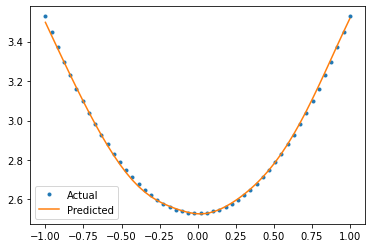

In [26]:
plt.plot(x, y, ".", label="Actual")
plt.plot(x, y_pred, "-", label="Predicted")
plt.legend()

In [27]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_36 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
